In [1]:
import os

import jax
import jax.numpy as jnp

import matplotlib.pyplot as plt
import numpy as np

/Users/grieser/Projects/alphagrad/src/alphagrad/eval/RoeFlux_1d/A0_data


/tmp/ipykernel_2712814/2967238341.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


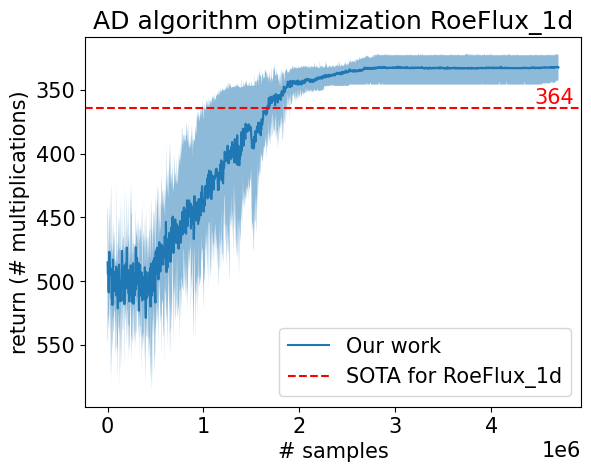

In [2]:

font = {"family" : "normal",
        "weight" : "normal",
        "size"   : 15}

plt.rc('font', **font)

runs = []
print(os.path.join(os.getcwd(), "A0_data"))
for file in os.listdir(path=os.path.join(os.getcwd(), "A0_data")):
				if file.endswith(".csv"):
								data = np.genfromtxt(os.path.join(os.getcwd(), "A0_data/", file), delimiter=",", skip_header=1)
								num_samples = data[:1500, 0]*32*98 
								num_muls = data[:1500, 1]
								runs.append(num_muls)

data = jnp.stack(runs, axis=0)

data_mean = jnp.mean(data, axis=0)
data_max = jnp.max(data, axis=0)
data_min	= jnp.min(data, axis=0)
data_err = jnp.stack([data_min, data_max], axis=0)

fig, ax = plt.subplots()
ax.plot(num_samples, data_mean, label="Our work")
ax.fill_between(num_samples, data_min, data_max, alpha=0.5)
ax.axhline(y=-364., color="r", linestyle="--", label="SOTA for RoeFlux_1d")
ax.annotate("364", (num_samples[-1], -364), textcoords="offset points", xytext=(-3, 3), ha="center", color="red")
ax.set_xlabel("# samples")
ax.set_ylabel("return (# multiplications)")
ax.set_title("AD algorithm optimization RoeFlux_1d")

ticks = ax.get_yticks()
labels = ax.get_yticklabels()
labels = [str(int(-t)) for t in ticks]
ax.set_yticklabels(labels)

ax.legend(loc="lower right")

In [2]:
from graphax.perf import plot_performance
from graphax.examples import RoeFlux_1d

In [3]:
# 320 mults
order = [8, 82, 27, 66, 7, 78, 76, 13, 48, 42, 68, 86, 95, 4, 59, 28, 77, 54, 1, 
         94, 5, 58, 72, 93, 75, 31, 53, 33, 57, 90, 44, 25, 89, 88, 84, 96, 74, 
         92, 83, 91, 45, 51, 81, 80, 11, 10, 85, 43, 22, 73, 19, 71, 6, 18, 17, 
         79, 47, 50, 52, 21, 37, 38, 55, 49, 69, 35, 65, 29, 64, 16, 9, 60, 15, 
         61, 23, 87, 70, 67, 24, 46, 63, 39, 2, 62, 3, 41, 40, 32, 26, 34, 56, 
         30, 14, 98, 36, 12, 20, 100] 

mM_order = [4, 5, 8, 9, 16, 17, 25, 27, 31, 33, 38, 43, 44, 45, 69, 84, 1, 2,
            10, 13, 18, 21, 26, 28, 32, 34, 37, 39, 42, 47, 50, 53, 57, 59, 
            62, 64, 66, 67, 68, 71, 73, 75, 76, 77, 80, 81, 83, 85, 86, 87, 
            91, 92, 95, 11, 14, 19, 22, 51, 54, 58, 60, 63, 65, 72, 79, 88, 
            90, 93, 96, 3, 6, 7, 15, 29, 40, 56, 61, 74, 78, 82, 48, 89, 94, 
            23, 35, 46, 24, 70, 41, 98, 100, 12, 20, 30, 49, 52, 55, 36]

In [4]:
shape = (512,)
xs = [.01, .02, .02, .01, .03, .03]
xs = [jnp.ones(shape)*x for x in xs]
xs = jax.device_put(xs, jax.devices("cpu")[0])
plot_performance(RoeFlux_1d, xs, order, mM_order, "./RoeFlux.png", samplesize=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

8 : 512
82 : 1024
27 : 512
66 : 1024
7 : 2048
78 : 1024
76 : 1024
13 : 1024
48 : 1024
42 : 1024
68 : 1024
86 : 1024
95 : 1024
4 : 512
59 : 1024
28 : 1024
77 : 1024
54 : 1024
1 : 1024
94 : 1024
5 : 512
58 : 1024
72 : 1024
93 : 1024
75 : 1024
31 : 512
53 : 1024
33 : 512
57 : 1024
90 : 1024
44 : 512
25 : 512
89 : 1536
88 : 1024
84 : 512
96 : 1536
74 : 1536
92 : 1024
83 : 1536
91 : 1024
45 : 512
51 : 1024
81 : 1024
80 : 1024
11 : 1024
10 : 1024
85 : 1024
43 : 1024
22 : 1024
73 : 1024
19 : 1024
71 : 1024
6 : 2048
18 : 1024
17 : 512
79 : 2560
47 : 1024
50 : 1024
52 : 7680
21 : 1024
37 : 1024
38 : 512
55 : 6144
49 : 7680
69 : 512
35 : 1024
65 : 1024
29 : 1536
64 : 1024
16 : 512
9 : 512
60 : 1536
15 : 2048
61 : 2048
23 : 3072
87 : 1024
70 : 3072
67 : 2048
24 : 6144
46 : 3072
63 : 1024
39 : 1024
2 : 1024
62 : 1024
3 : 3072
41 : 1536
40 : 3072
32 : 1024
26 : 1024
34 : 1536
56 : 2048
30 : 6144
14 : 1536
98 : 3584
36 : 9216
12 : 4608
20 : 4608
100 : 3072


 27%|██▋       | 269/1000 [00:01<00:02, 269.92it/s]

KeyboardInterrupt: 

### The best
fwd mean: 3.032777786254883, rev mean: 3.081002712249756, mM mean: 2.866410732269287, cc mean: 2.188291549682617
fwd err: [-0.27058816  0.17363954], rev err: [-0.22816157  0.17084837], mM err: [-0.65521526  0.21982956], cc err: [-0.3505528   0.30476046]

fwd mean: 2.9437732696533203, rev mean: 2.9337830543518066, mM mean: 2.9530389308929443, cc mean: 2.760946750640869
fwd err: [-0.0979023   0.09854531], rev err: [-0.09846926  0.09681487], mM err: [-0.09948778  0.11885738], cc err: [-0.19083905  0.13550425]

fwd mean: 2.6247079372406006, rev mean: 3.05964994430542, mM mean: 2.979163885116577, cc mean: 2.4885149002075195
fwd err: [-0.37772202  1.0231125 ], rev err: [-0.19163871  0.5160451 ], mM err: [-0.8269043   0.85118294], cc err: [-1.2484213   0.89338493]

fwd mean: 2.8178303241729736, rev mean: 2.811877965927124, mM mean: 2.4827146530151367, cc mean: 2.0367538928985596 
fwd err: [-0.17321444  0.15326643], rev err: [-0.18122506  0.18415976], mM err: [-0.3973658   0.29247832], cc err: [-0.18973374  0.655694  ]

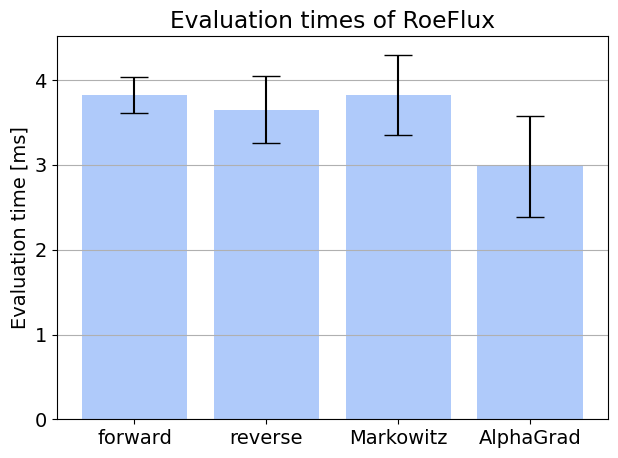

In [6]:
# Order: fwd, rev, mM, cc
# means = jnp.array([2.6247079372406006, 3.6495230197906494, 3.825319290161133, 2.9825470447540283])
# stds = jnp.array([0.2087354212999344, 0.39476415514945984, 0.47684094309806824, 0.6004145741462708])

means = jnp.array([3.8236873149871826, 3.6495230197906494, 3.825319290161133, 2.9825470447540283])
stds = jnp.array([0.2087354212999344, 0.39476415514945984, 0.47684094309806824, 0.6004145741462708])
x_pos = jnp.arange(len(means))
modes = ["forward", "reverse", "Markowitz", "AlphaGrad"]


fig, ax = plt.subplots()
ax.bar(x_pos, means, yerr=stds, align="center", alpha=0.5, 
            ecolor="black", color="#6096f6", capsize=10)
    
ax.set_ylabel("Evaluation time [ms]", fontsize=14)
ax.set_xticks(x_pos)
ax.set_xticklabels(modes, fontsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.set_title(f"Evaluation times of RoeFlux")
ax.yaxis.grid(True)  
# ax.set_ylim((0.025, 0.04))

plt.tight_layout()

In [5]:
from graphax.perf import plot_performance_jax_only
plot_performance_jax_only(RoeFlux_1d, xs, "./RoeFlux_jax.png", samplesize=1000)

TypeError: plot_performance_jax_only() got multiple values for argument 'samplesize'

 27%|██▋       | 269/1000 [00:20<00:02, 269.92it/s]